# Table of contents
1. Data Loading and Setup

2. EDA

3. Data Visualization

    3.1 Histogram of Numerical Features

    3.2 Boxplots for numerical features to identify outliers

    3.3 Count plots for all categorical variables

    3.4 Relationship between disease and conditions

    3.5 Prepare dataset

    3.6 Heart Disease Correlation

    3.7 Correlation Matrix

# 1. Data Loading and Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# To display all columns of the DataFrame
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('CVD_cleaned.csv')

# 2. EDA

In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [3]:
# Display summary statistics for numerical columns
df.describe()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [4]:
# Display first 5 rows of the dataset
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:

# Check for missing values
df.isnull().sum()


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
columns = ["General_Health", "Checkup", "Exercise", "Heart_Disease", "Skin_Cancer", "Other_Cancer", 
           "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Height_(cm)", 
           "Weight_(kg)", "BMI", "Smoking_History", "Alcohol_Consumption", "Fruit_Consumption", 
           "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

for col in columns:
    print(f"Value counts for {col}:")
    print(df[[col]].value_counts())
    print("\n" + "-"*40 + "\n")



Value counts for General_Health:
General_Health
Very Good         110395
Good               95364
Excellent          55954
Fair               35810
Poor               11331
Name: count, dtype: int64

----------------------------------------

Value counts for Checkup:
Checkup                
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

----------------------------------------

Value counts for Exercise:
Exercise
Yes         239381
No           69473
Name: count, dtype: int64

----------------------------------------

Value counts for Heart_Disease:
Heart_Disease
No               283883
Yes               24971
Name: count, dtype: int64

----------------------------------------

Value counts for Skin_Cancer:
Skin_Cancer
No             278860
Yes             29994
Name: count, dtype: int64

----------------------------------------

Value co

# 3. Data Visualization

##### 3.1 Histogram of Numerical Features

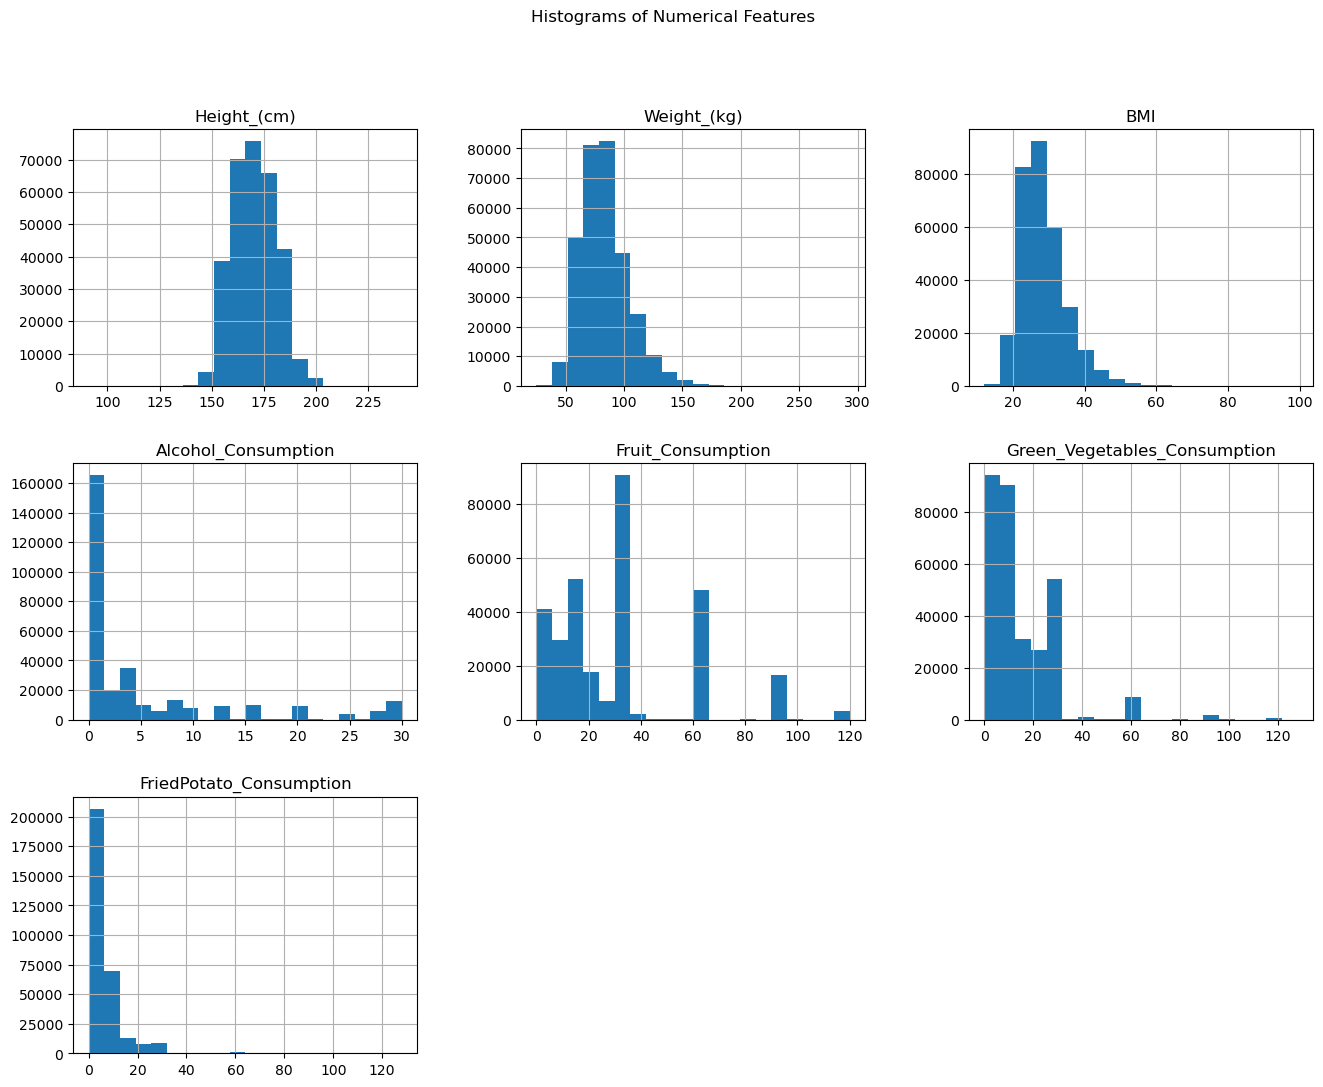

In [7]:
# Plot histograms of all numerical columns
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


##### 3.2 Boxplots for numerical features to identify outliers

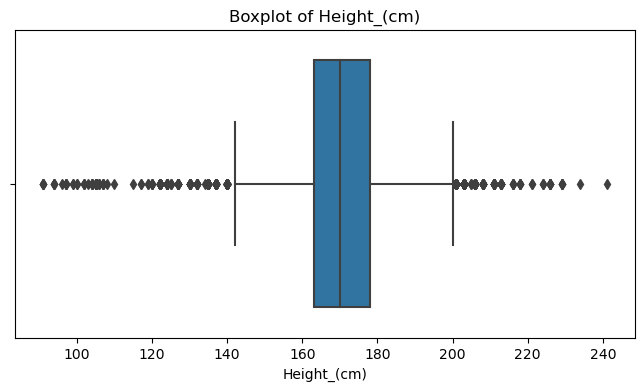

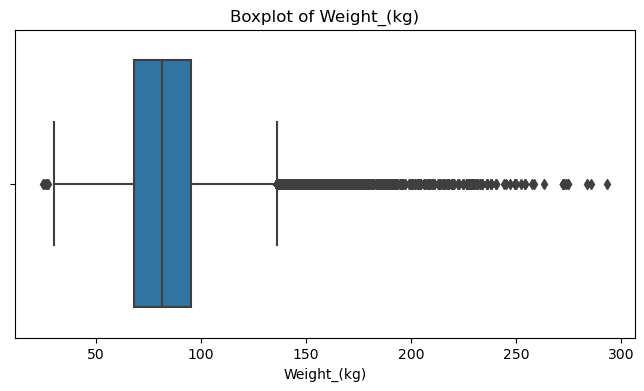

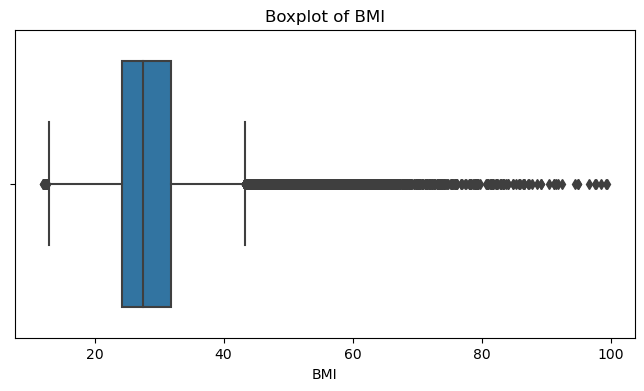

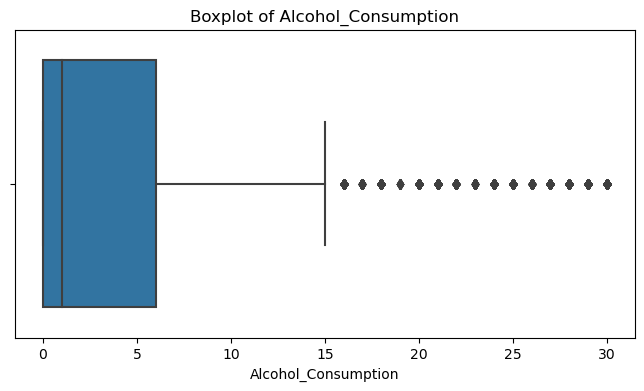

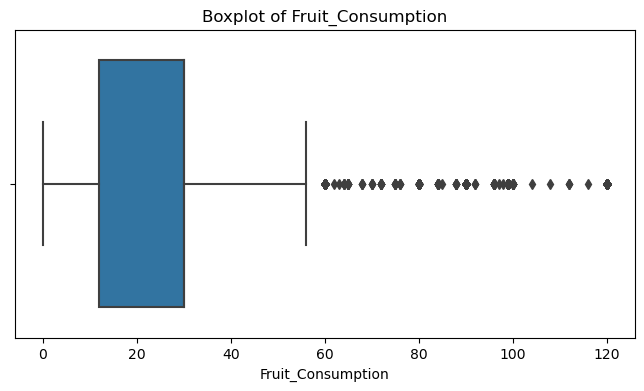

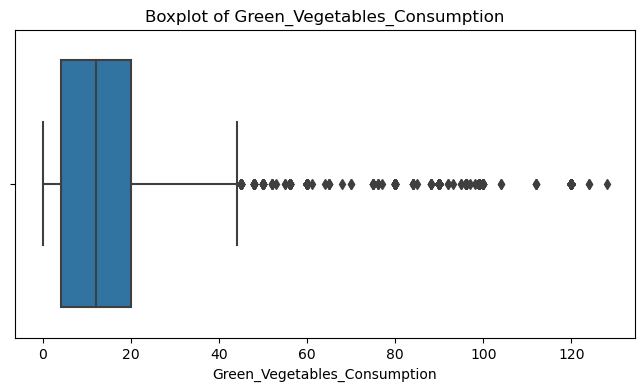

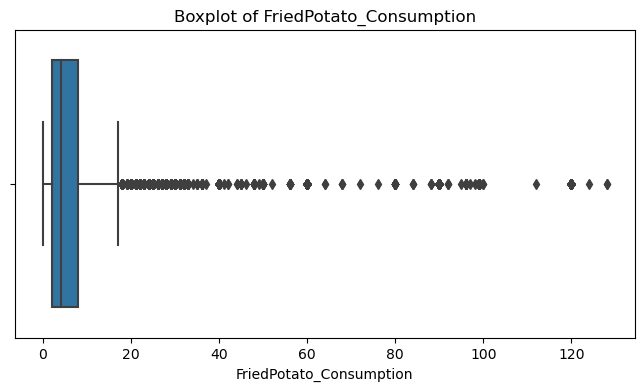

In [9]:
# Plotting boxplots for numerical features to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


##### 3.3 Count plots for all categorical variables

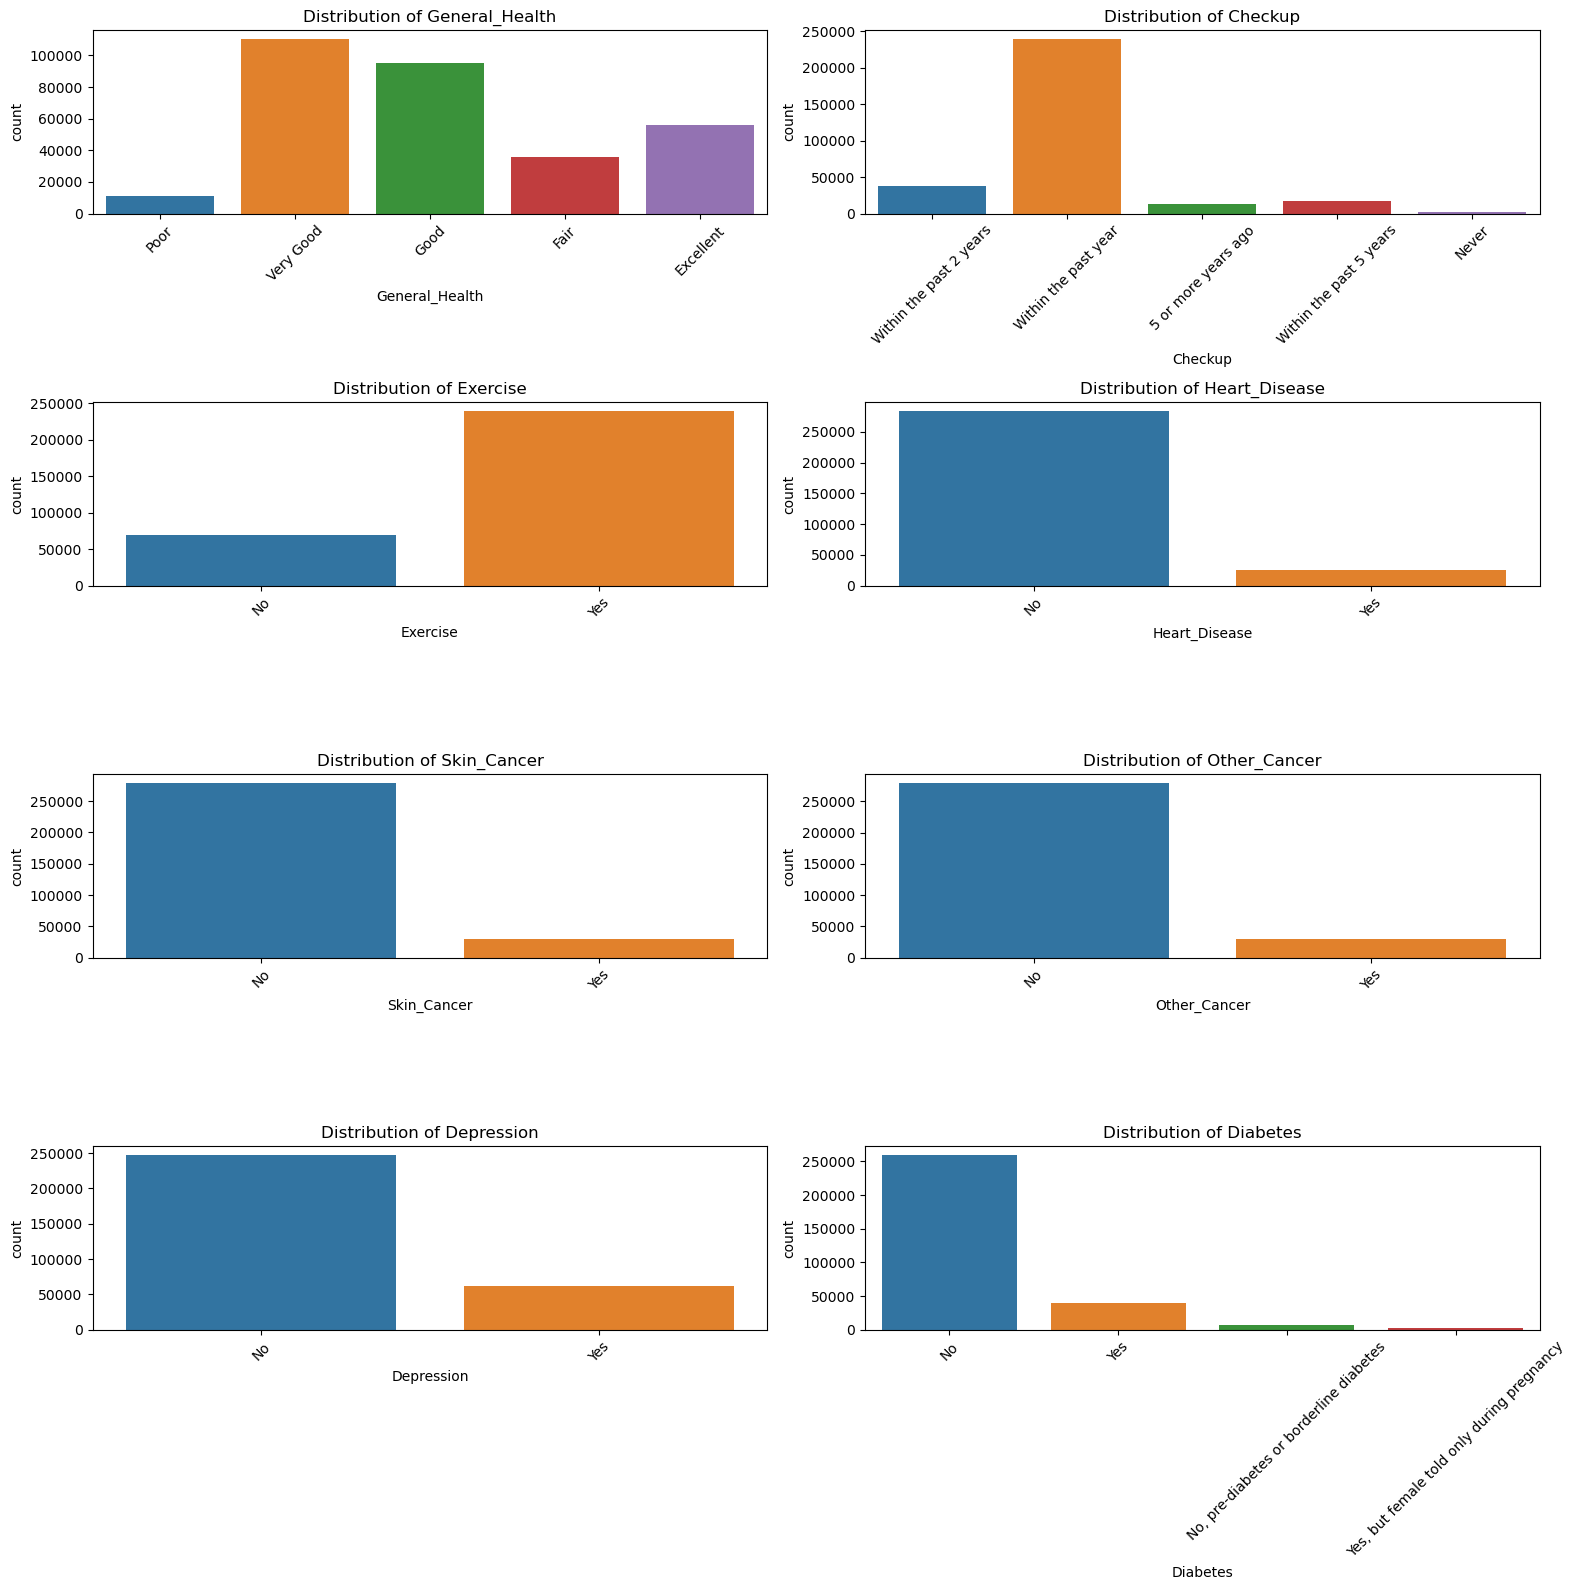

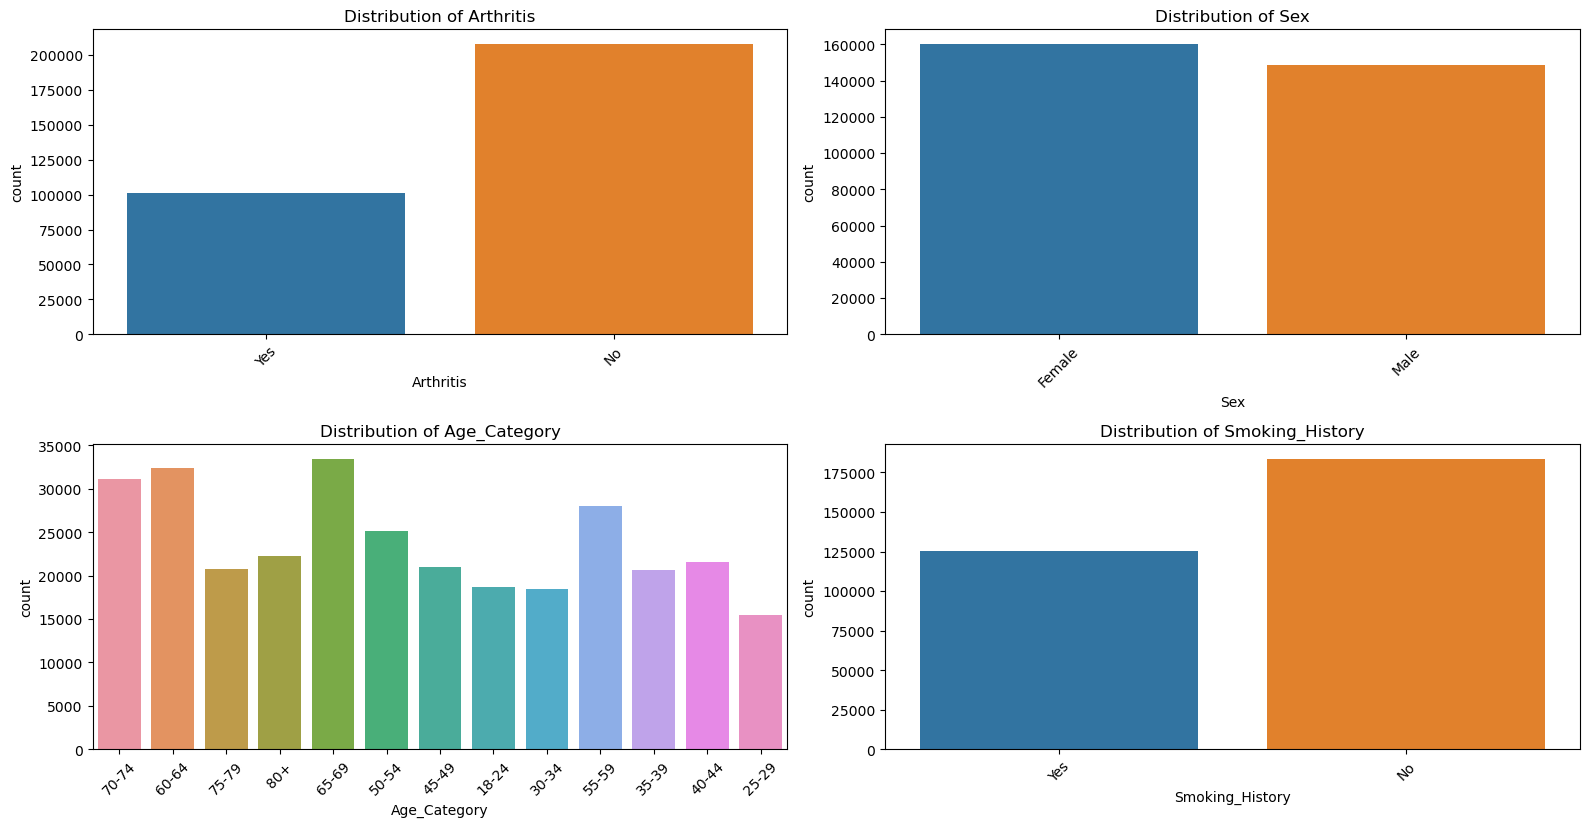

In [10]:
# Plot count plots for all categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Set the number of rows and columns for the grid (4x4)
n_cols = 2
n_rows = 4

# Loop through categorical columns in chunks of 16 (4x4 grid)
for i in range(0, len(categorical_columns), n_cols * n_rows):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))  # Set figure size for 4x4 grid
    
    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Loop through the chunk of 16 categorical columns
    for j, col in enumerate(categorical_columns[i:i + n_cols * n_rows]):
        sns.countplot(data=df, x=col, ax=axes[j])
        axes[j].set_title(f"Distribution of {col}")
        axes[j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Remove any unused subplots (if not a perfect multiple of 16)
    for j in range(len(categorical_columns[i:i + n_cols * n_rows]), n_cols * n_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



##### 3.4 relationship between disease and conditions

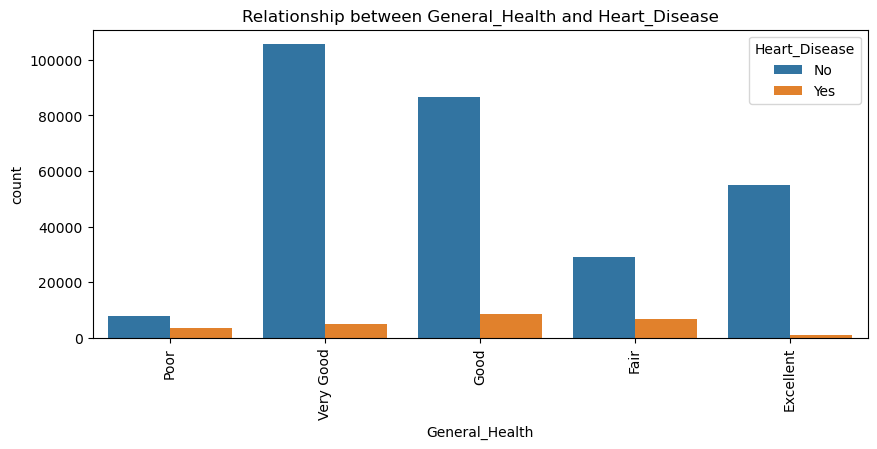

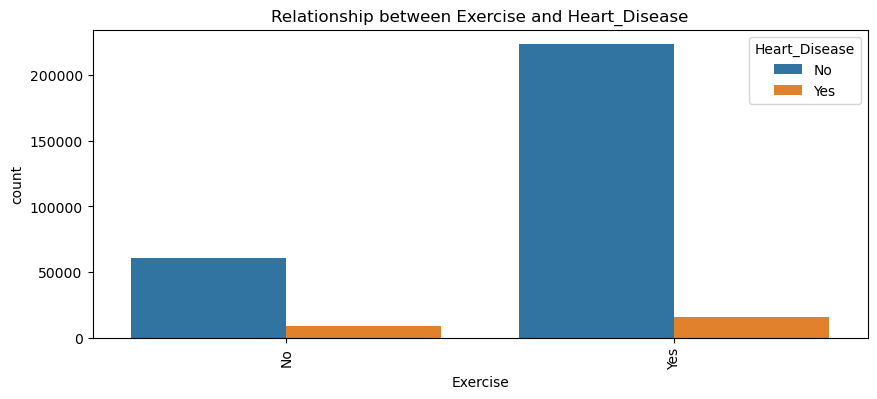

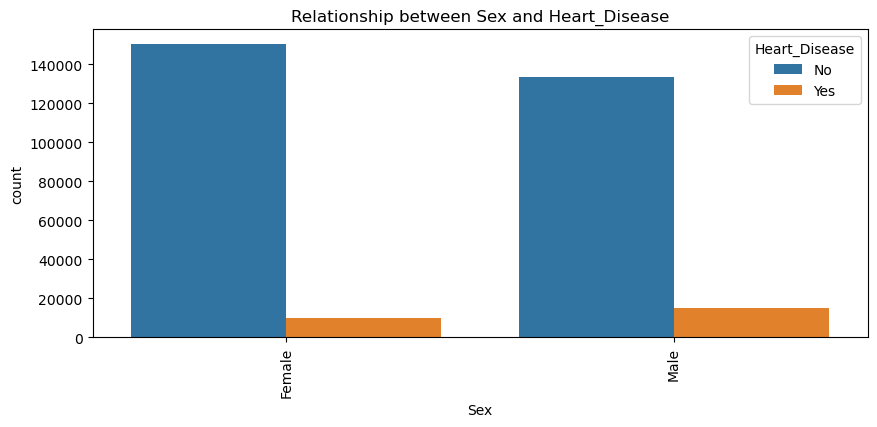

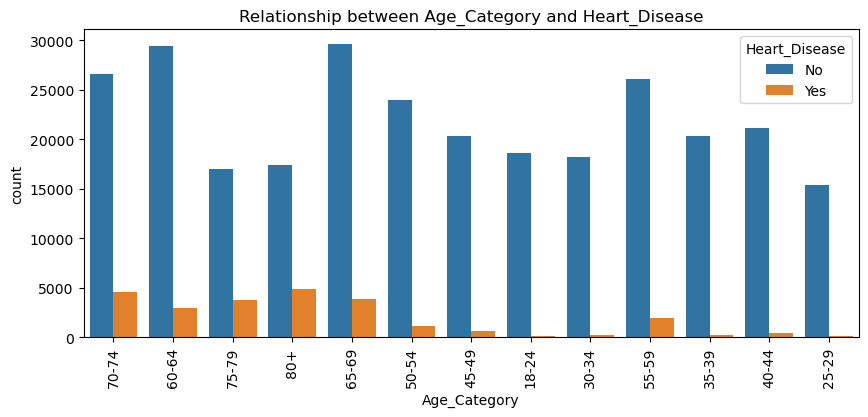

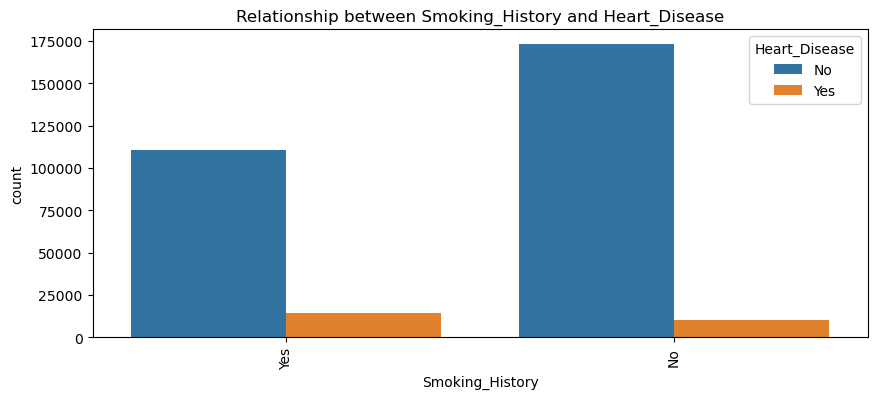

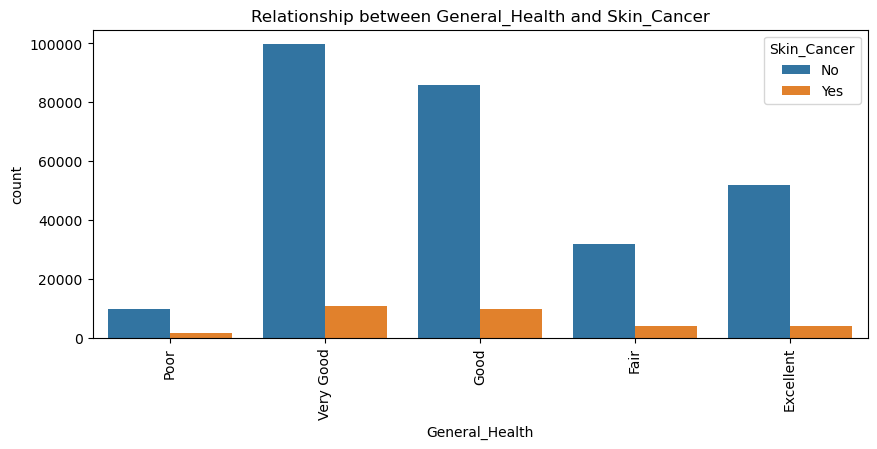

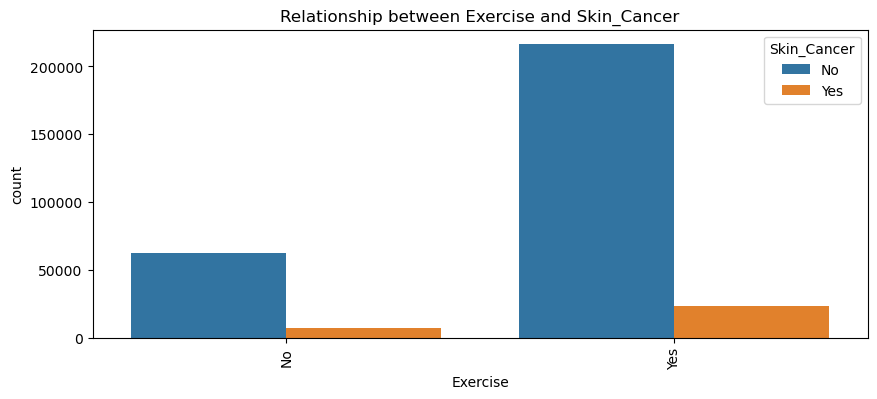

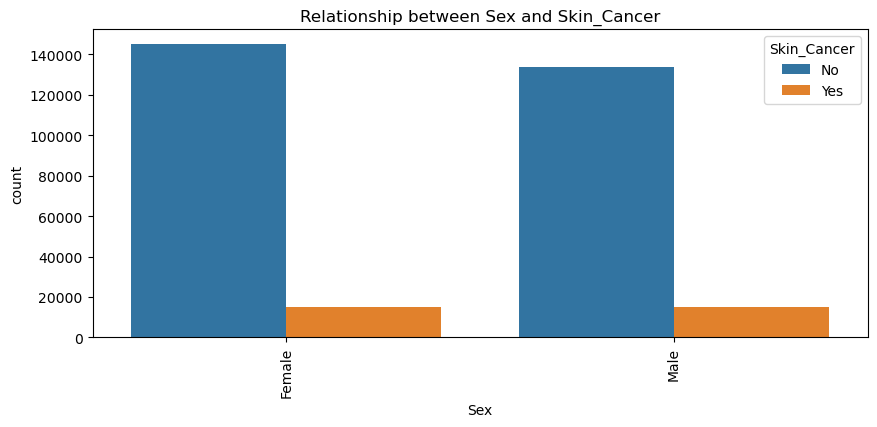

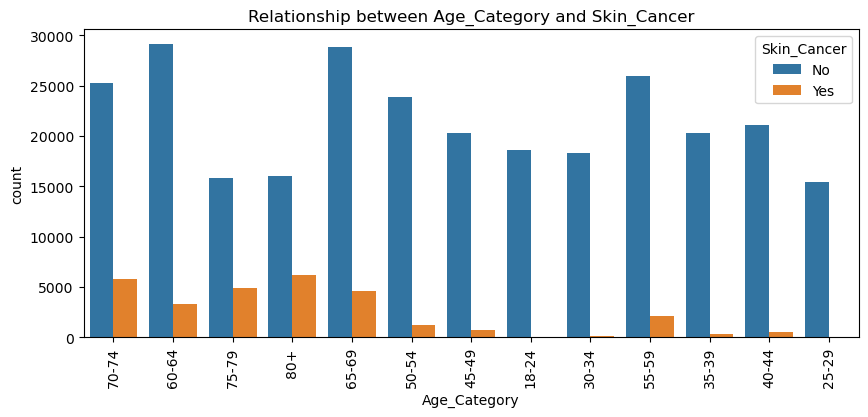

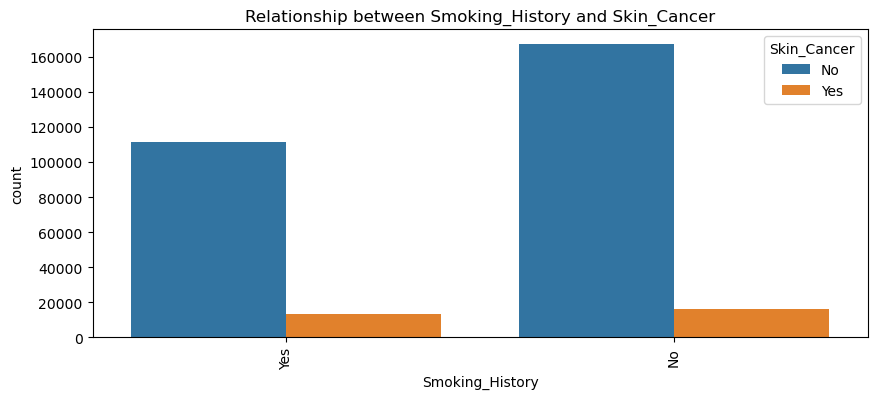

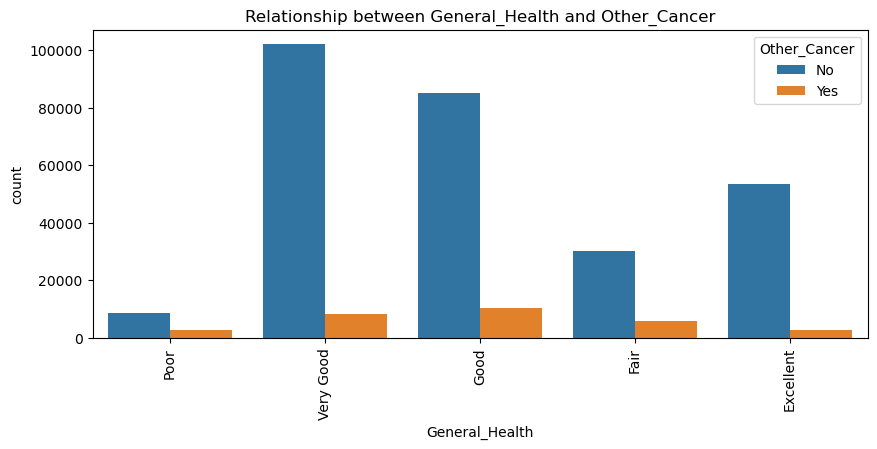

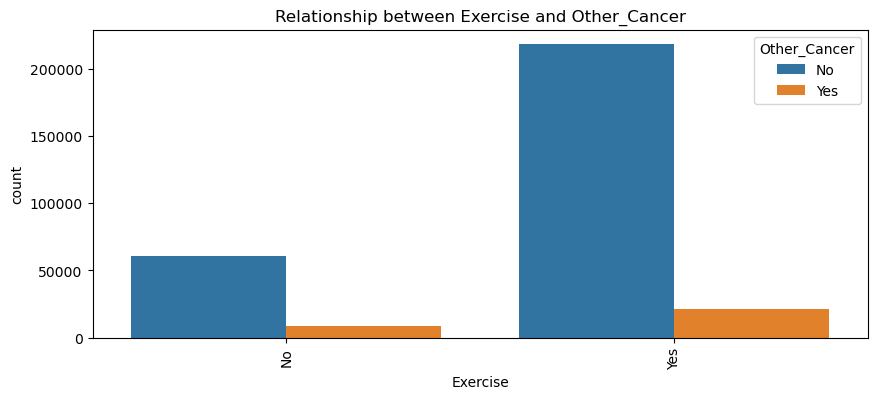

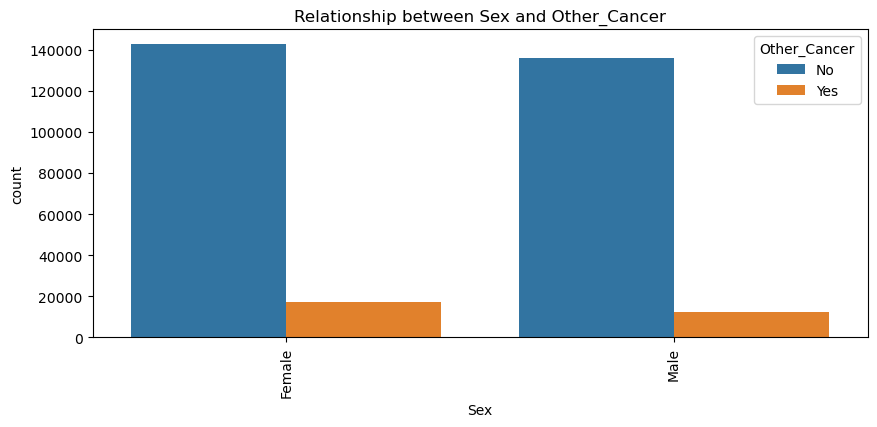

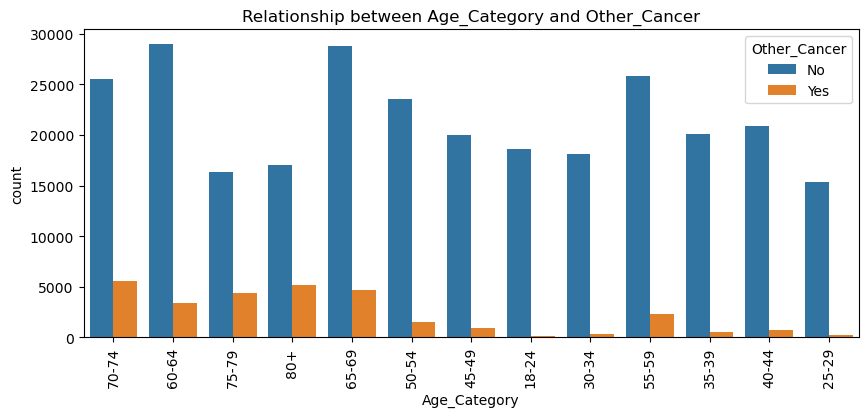

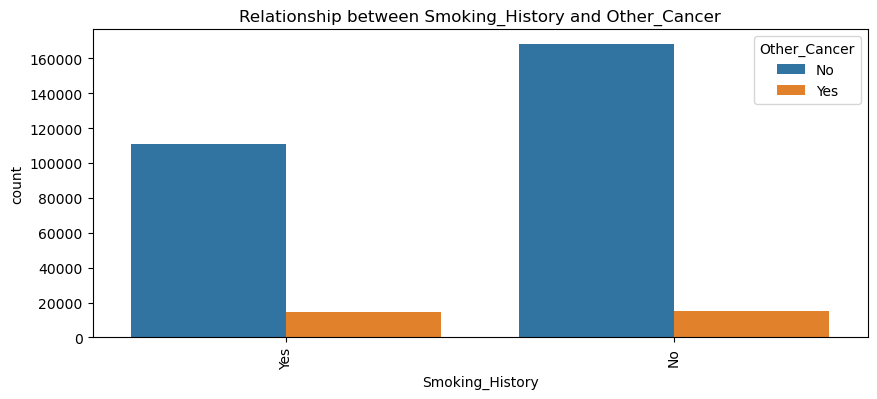

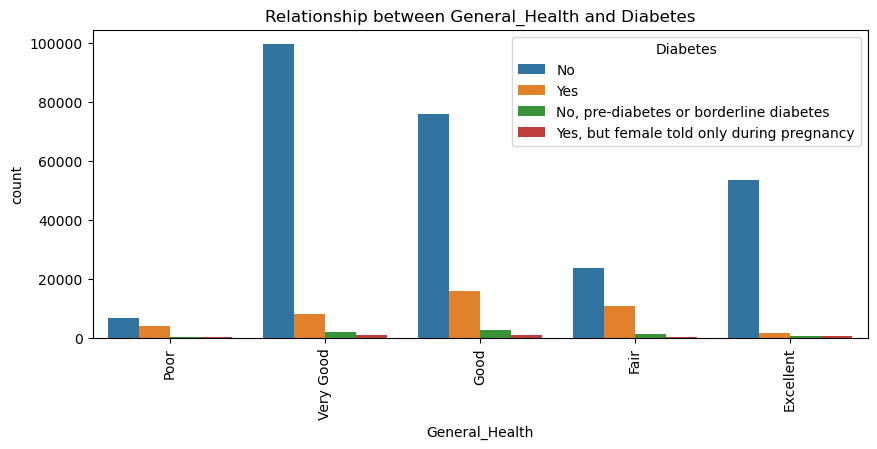

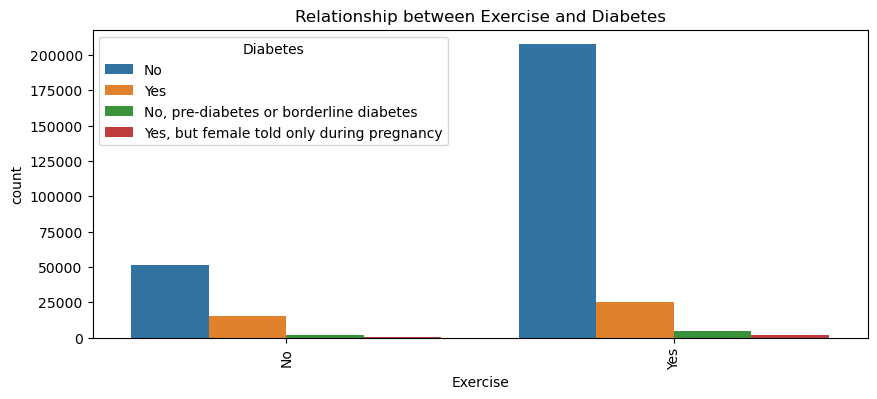

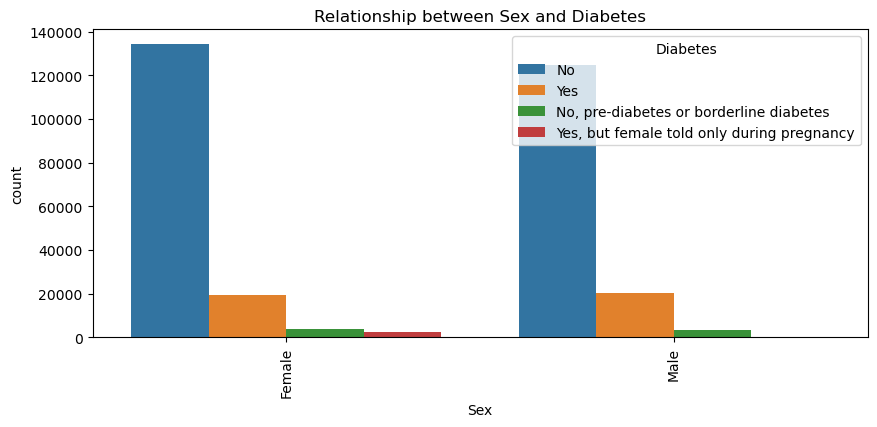

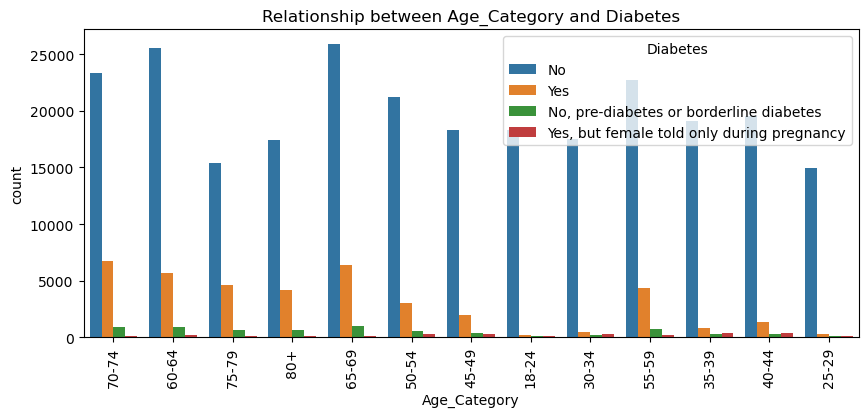

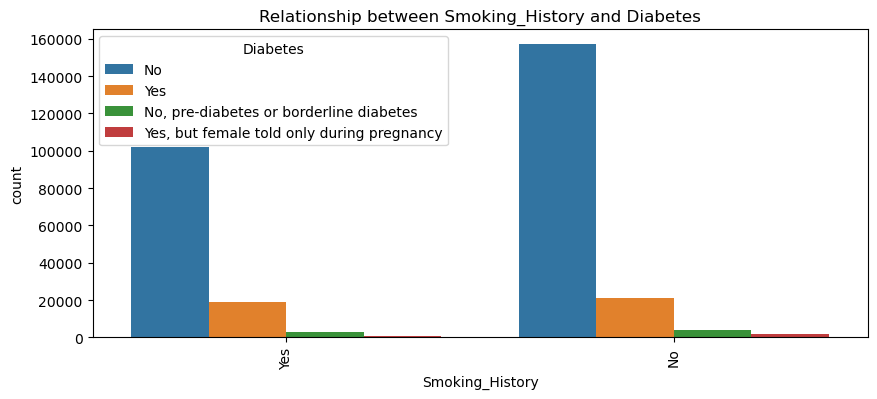

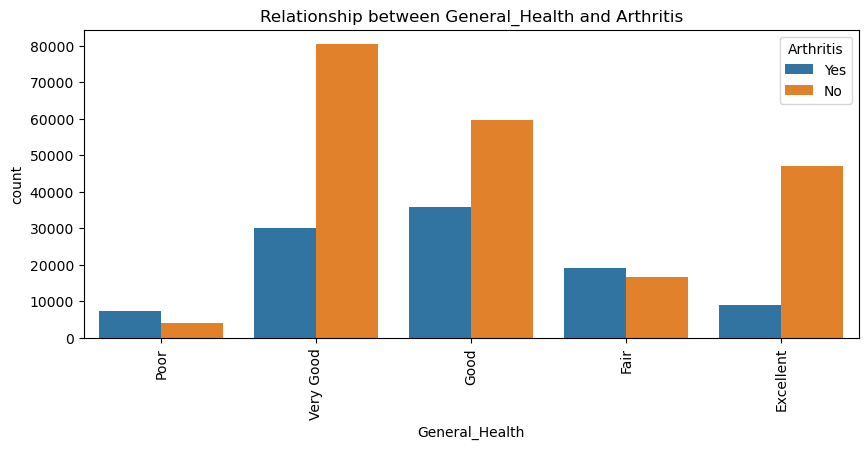

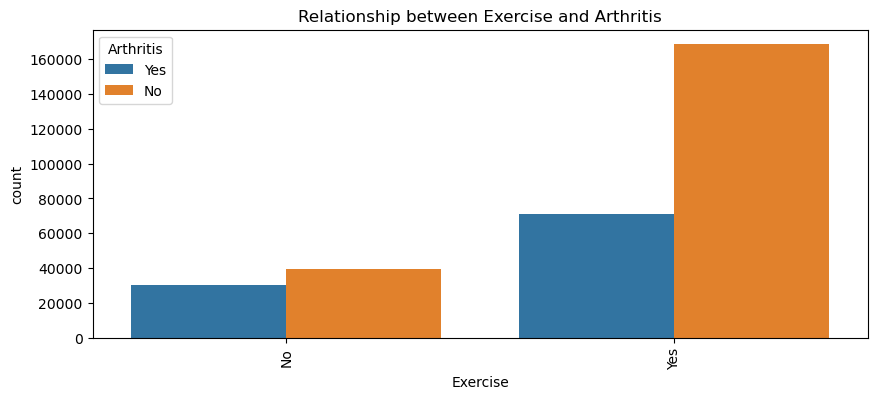

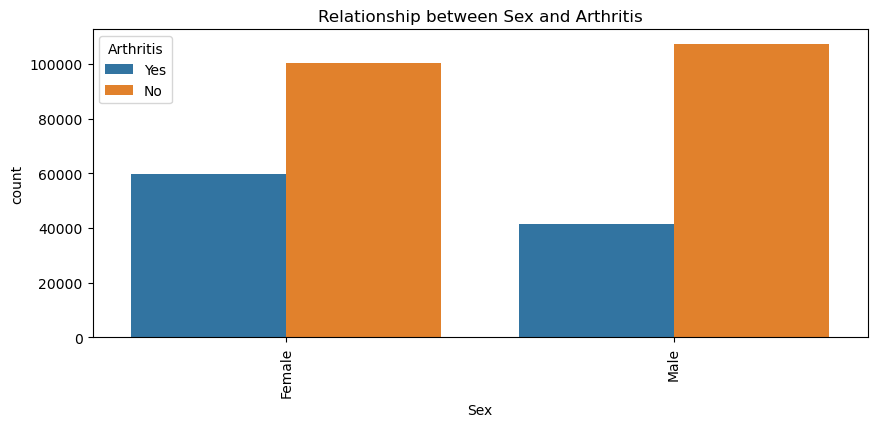

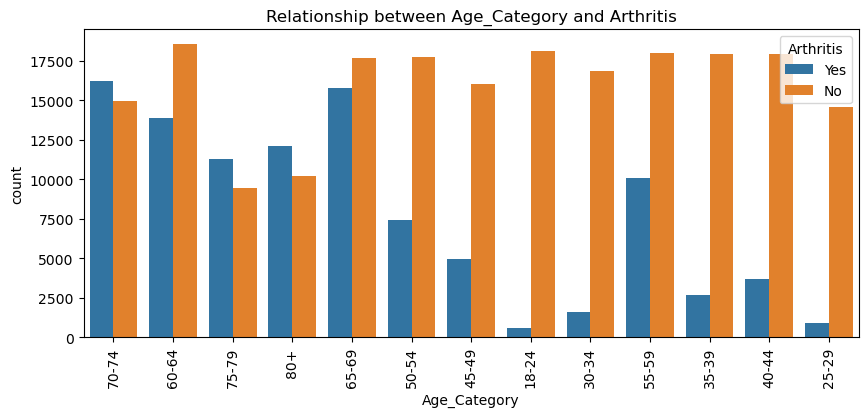

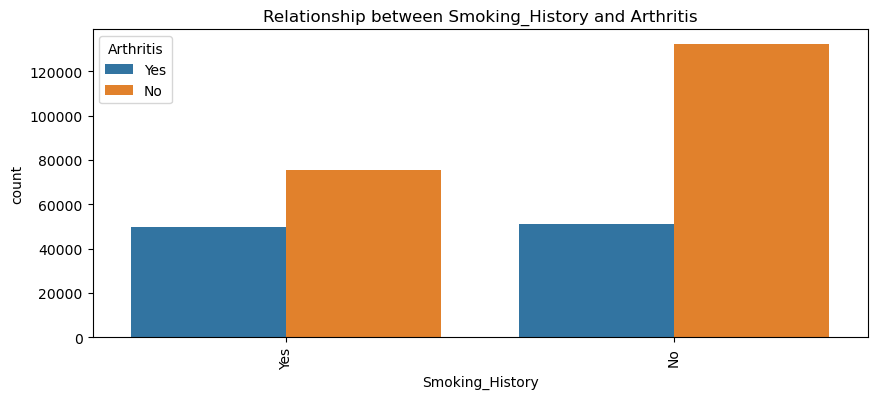

In [11]:
# Analyze the relationship between the disease conditions for some of the variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

##### 3.5 Prepare dataset

In [12]:
# Re-import the dataset
data = pd.read_csv('CVD_cleaned.csv')

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    
# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    
    

# Display the first few rows of the cleaned dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,True,False
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,True,False
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,True,False
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,False,True
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,False,True


##### 4.6 Heart Disease Correlation

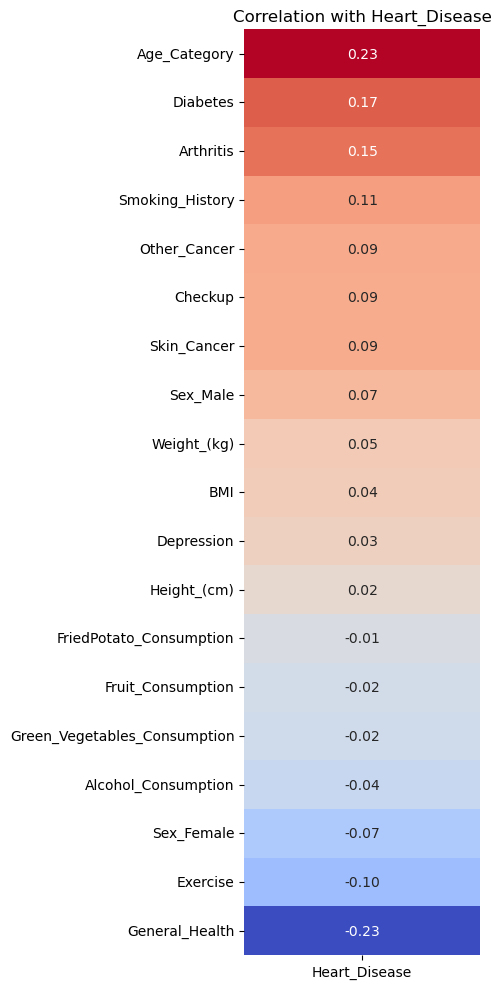

In [13]:
# Specify the target disease variable (Heart_Disease)
target_variable = 'Heart_Disease'

# Compute the correlation matrix
corr = data.corr()  # Make sure you use 'df' as the DataFrame you're working with

# Compute the correlation with Heart_Disease and drop the target variable itself
target_corr = corr[target_variable].drop(target_variable)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with Heart_Disease
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title(f'Correlation with {target_variable}')
plt.tight_layout()

# Show the plot
plt.show()

##### 3.7 Correlation Matrix

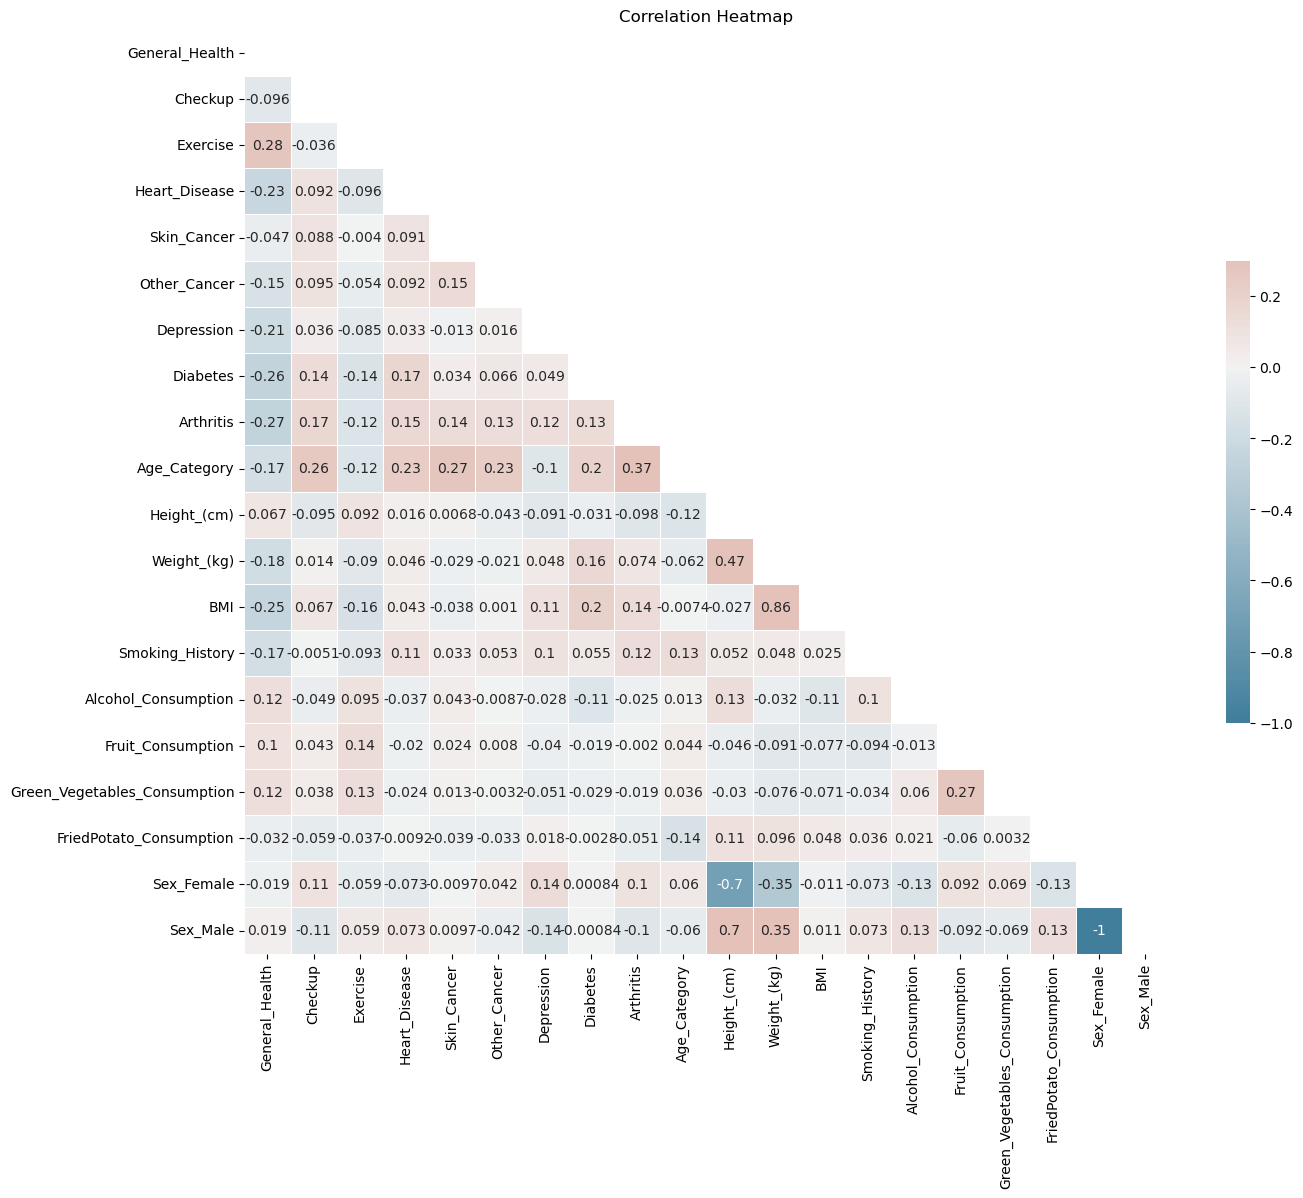

In [14]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()